## Explore Time Series

Load python modules

In [14]:
import os, sys
import requests
import pandas as pd
from datetime import timedelta, datetime, timezone

Load Local Scripts

In [2]:
scripts_module_path = os.path.abspath(os.path.join(os.getcwd(),'..', 'scripts'))
if scripts_module_path not in sys.path:
    sys.path.append(scripts_module_path)
from acquisition import Acquisition as Akw

In [3]:
cg_platforms = Akw.readDataLocally("cg_asset_platforms")
ethereum_ids = [pltf for pltf in cg_platforms if pltf["name"]=="ethereum"]
ethereum_id = (ethereum_ids[0] if len(ethereum_ids)>0 else dict())
ethereum_id

{'id': 'ethereum', 'chain_identifier': 1, 'name': 'ethereum', 'shortname': ''}

In [5]:
cg_coins = Akw.readDataLocally("cg_supported_coins",downloadIfMissing=True)

## get Dai Timeseries

In [19]:
import matplotlib.pyplot as plt

In [17]:
dt = datetime(year=2019,month=11,day=18)
timestamp_from = round(dt.replace(tzinfo=timezone.utc).timestamp())
timestamp_till = round(datetime.now().replace(tzinfo=timezone.utc).timestamp())

In [27]:
daitousd = Akw.readDataLocally(whichData="cg_dai_usd", **{"from":timestamp_from, "to":timestamp_till})
daitousdprices = list(map(lambda x: x[1] ,daitousd["prices"]))
daitousddtimes = list(map(lambda x: datetime.fromtimestamp(x[0] / 1000) ,daitousd["prices"]))

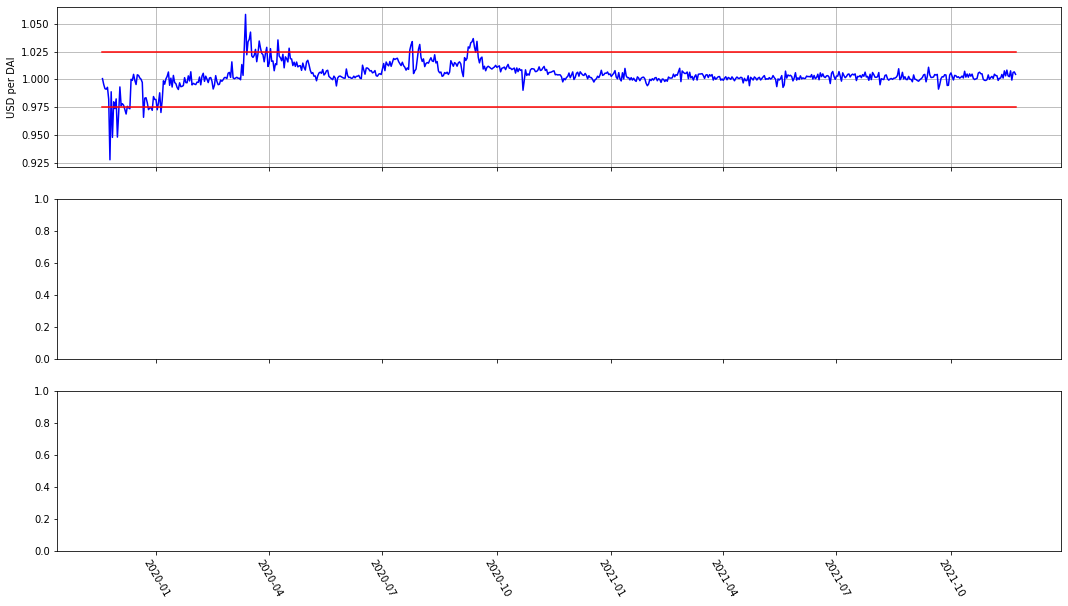

In [48]:
fig, axes = plt.subplots(nrows=3,ncols=1,sharex=True)
fig.set_figwidth(18)
fig.set_figheight(10)
axes[0].plot(daitousddtimes, daitousdprices,'-b')
axes[0].plot(daitousddtimes, [1.025] * len(daitousddtimes),'-r')
axes[0].plot(daitousddtimes, [0.975] * len(daitousddtimes),'-r')
axes[0].set(ylabel="USD per DAI")
axes[0].grid()
plt.xticks(rotation=-60)
plt.show()

In [ ]:
daitousdprices